- Name : Bhavansh Gupta
- Roll No : BECOA134
- Assignment : 2
- Title : K Nearest Neighbours

In [2]:
import pandas as pd
import numpy as np

In [11]:
# Read Dataset
dataset = pd.read_csv("dataset.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,2].values

print(X)
print(y)

[[2 4]
 [4 6]
 [4 4]
 [4 2]
 [6 4]
 [6 2]]
['negative' 'negative' 'positive' 'negative' 'negative' 'positive']


In [12]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Predict the class of point (6,6)

x_test = np.array([6,6])
y_pred = classifier.predict([x_test])
ans  = ""

if y_pred[0] =='negative':
    ans = "orange"
else:
    ans = "blue"

print('General KNN : ', y_pred[0],'(', ans, ')')

General KNN :  negative ( orange )


In [19]:
# Distance Weighted KNN

classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
classifier.fit(X,y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [20]:
# Predict the class of point (6,6)

x_test = np.array([6,6])
y_pred = classifier.predict([x_test])
ans  = ""

if y_pred[0] =='negative':
    ans = "orange"
else:
    ans = "blue"

print('General KNN : ', y_pred[0],'(', ans, ')')

General KNN :  negative ( orange )


In [44]:
# Using Iris Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       Species  
0       se

In [36]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [37]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [42]:
X = df.iloc[:,:4]
X = preprocessing.StandardScaler().fit_transform(X)
y = df['Species']

In [46]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [49]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy ", acc)

Accuracy  0.9777777777777777


array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

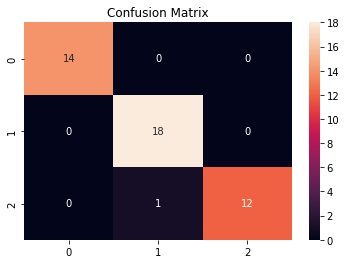

In [50]:
conf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_matrix,annot=True,fmt="d")
plt.ylabel = "Actual"
plt.xlabel = "Predicted"
plt.title("Confusion Matrix")
conf_matrix